# <center> Introduction to Pandas and Statsmodels and ANOVA
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="400" /> 
### <center> Instructor: Dr. Jeremy Daily

"All models are wrong; some models are useful." - Box, Hunter and Hunter

### Randomized Block Experiments
In a paired comparison, the difference between two treatments were analyzed. However, this approach breaks down if there are multiple treatments. 

Consider an experiment to manufacture penicillin with four different variants of a process. We'll label these process A, B, C, and D. However, the raw material used to make the medicine also introduces variation in the process. Therefore, a design that randomized the raw material would be too noisy. Instead, the raw material was blocked and the treatments (ABCD) were randomly assigned within each of the blends of raw material. There were 5 blends to use, so the blend of the raw material was used as a blocking variable.

The order of the treatments (ABCD) were randomized within each block.

The results were tabulated as follows:

| Block |   A   |   B   |   C   |   D   | Block Averages | Block Deviations |
| --- | --- | --- | --- | --- | --- | --- |
| Blend 1 | 89 | 88 | 97 | 94 | 92 | +6 |
| Blend 2 | 84 | 77 | 92 | 79 | 83 | -3 |
| Blend 3 | 81 | 87 | 87 | 85 | 85 | -1 |
| Blend 4 | 87 | 92 | 89 | 84 | 88 | +2 |
| Blend 5 | 79 | 81 | 80 | 88 | 82 | -4 |
| Treatment Averages | 84 | 85 | 89 | 86| Grand Average: 86 |
| Treatment Deviations | -2 | -1 | +3| 0 | |



## Pandas
Pandas are a modern data science tool for Python.

https://pandas.pydata.org/. 

They help put data into easy to use forms and have a lot of useful tools for performing analysis and visualization.

In [1]:
import pandas as pd

First, we need to get data into the machine. Often we'll have text based data that's separated with a delimiter.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
# Example from Penicillin Yield Example
data = """run block treatment  y
  1     1     A 89
  4     2     A 84
  2     3     A 81
  1     4     A 87
  3     5     A 79
  3     1     B 88
  2     2     B 77
  1     3     B 87
  3     4     B 92
  4     5     B 81
  2     1     C 97
  3     2     C 92
  4     3     C 87
  2     4     C 89
  1     5     C 80
  4     1     D 94
  1     2     D 79
  3     3     D 85
  4     4     D 84
  2     5     D 88"""
#Make a file like IO for the data and import the data into a pandas data frame
with open('data.txt','w') as f:
    f.write(data)

df = pd.read_csv("data.txt", sep=' ', skipinitialspace=True)
#Show the pandas dataframe
df

,run,block,treatment,y
0,1,1,A,89
1,4,2,A,84
2,2,3,A,81
3,1,4,A,87
4,3,5,A,79
5,3,1,B,88
6,2,2,B,77
7,1,3,B,87
8,3,4,B,92
9,4,5,B,81


In [3]:
#treatment Averages 
# See bottom of Table 
df.groupby(['treatment']).mean()

,run,block,y
treatment,,,
A,2.2,3.0,84.0
B,2.6,3.0,85.0
C,2.4,3.0,89.0
D,2.8,3.0,86.0


In [4]:
## Block Averages
# See right side of Table 
df.groupby(['block']).mean()

,run,y
block,,
1,2.5,92.0
2,2.5,83.0
3,2.5,85.0
4,2.5,88.0
5,2.5,82.0


In [5]:
df.mean()

run       2.5
block     3.0
y        86.0
dtype: float64

In [6]:
grand_average = df.mean()['y']
grand_average

86.0

In [7]:
#Get deviations
# See far right of table 
df.groupby(['block']).mean() - grand_average

,run,y
block,,
1,-83.5,6.0
2,-83.5,-3.0
3,-83.5,-1.0
4,-83.5,2.0
5,-83.5,-4.0


In [8]:
#Get deviations
# See bottom of table 
df.groupby(['treatment']).mean() - grand_average

,run,block,y
treatment,,,
A,-83.8,-83.0,-2.0
B,-83.4,-83.0,-1.0
C,-83.6,-83.0,3.0
D,-83.2,-83.0,0.0


In [9]:
# Calculate Sum of Squares
SS_total = ((df['y']-grand_average)**2).sum()
SS_total

560.0

In [10]:
SS_total_dof = len(df['y']) - 1
SS_total_dof

19

In [11]:
n_blocks = len(df.groupby(['block']))
n_blocks

5

In [12]:
SS_blocks_dof = n_blocks - 1
SS_blocks_dof

4

In [13]:
n_treatments = len(df.groupby(['treatment']))
n_treatments

4

In [14]:
# Sum of square of the blocks is weighted with the number of treatments
SS_blocks = n_treatments*((df.groupby(['block']).mean()['y'] - grand_average)**2).sum()
SS_blocks

264.0

In [15]:
# Sum of square of the treatments is weighted with the number of blocks
SS_treatments = n_blocks*((df.groupby(['treatment']).mean()['y'] - grand_average)**2).sum()
SS_treatments

70.0

In [16]:
SS_treatments_dof = n_treatments - 1
SS_treatments_dof

3

In [17]:
#Residuals
SS_residuals = ((df.groupby(['treatment']).mean()['y'] - df.groupby(['block']).mean()['y'] - grand_average)**2).sum()
SS_residuals

0.0

In [18]:
i = 0
residuals = []
treatments = df.groupby(['treatment'])
blocks = df.groupby(['block'])
for treats,t_bar in zip(treatments,treatments['y'].mean()):
    for b_bar in blocks['y'].mean():
        observation = treats[1]['y'][i]
        residual =observation - t_bar - b_bar + grand_average
        residuals.append(residual)
        print(observation,t_bar,b_bar,residual)
        i += 1
residuals = pd.Series(residuals)
print(residuals)

89 84 92 -1.0
84 84 83 3.0
81 84 85 -2.0
87 84 88 1.0
79 84 82 -1.0
88 85 92 -3.0
77 85 83 -5.0
87 85 85 3.0
92 85 88 5.0
81 85 82 0.0
97 89 92 2.0
92 89 83 6.0
87 89 85 -1.0
89 89 88 -2.0
80 89 82 -5.0
94 86 92 2.0
79 86 83 -4.0
85 86 85 0.0
84 86 88 -4.0
88 86 82 6.0
0    -1.0
1     3.0
2    -2.0
3     1.0
4    -1.0
5    -3.0
6    -5.0
7     3.0
8     5.0
9     0.0
10    2.0
11    6.0
12   -1.0
13   -2.0
14   -5.0
15    2.0
16   -4.0
17    0.0
18   -4.0
19    6.0
dtype: float64


In [19]:
SS_resid = (residuals**2).sum()
SS_resid

226.0

In [20]:
# Determine the degrees of freedom in the residuals by accounting for the DOF in the
# Blocks, treatments, and grand average
SS_resid_dof = len(residuals) - SS_blocks_dof - SS_treatments_dof - 1
SS_resid_dof = len(residuals) - SS_blocks_dof - SS_treatments_dof - 1
SS_resid_dof

12

In [21]:
# Perhaps an easier calculation
SS_resid_dof = SS_blocks_dof*SS_treatments_dof
SS_resid_dof

12

In [22]:
#Calculate Mean Square error
MSB = SS_blocks/SS_blocks_dof
MSB

66.0

In [23]:
#Calculate Mean Square error
MST = SS_treatments/SS_treatments_dof
MST

23.333333333333332

In [24]:
MSR = SS_resid/SS_resid_dof
MSR

18.833333333333332

In [25]:
#Determine F ratio
F_B = MSB/MSR
F_B

3.504424778761062

In [26]:
#Determine F ratio
F_T = MST/MSR
F_T

1.238938053097345

In [28]:
# Use the F Distribution for calculations
from scipy.stats import f

In [29]:
# Determine P Values using the F survival functions
p_B = f.sf(F_B,SS_blocks_dof,SS_resid_dof)
p_B

0.04074617318361785

In [30]:
p_T = f.sf(F_T,SS_treatments_dof,SS_resid_dof)
p_T

0.33865811618671526

## Building an ANOVA Table
Using the above calculations, we can insert the results into a table. 

| Source of Variation | Sum of Squares | Degrees of Freedom | Mean Square | F ratio | p value | 
| :--- | :--- | :--- | :--- | :--- | --: |
| Between blocks | $SS_B = 264$ | $\nu_B = n-1 = 4$ | $MS_B = 66.0$ | $$F_{4,12} = 3.504$$ | 0.0407 | 
| Between treatments | $SS_T = 70$ | $\nu_T = k-1 = 3$ | $MS_T = 23.3$ | $$F_{3,12} = 1.239$$ | 0.339 | 
| Residuals | $SS_R = 226$ | $\nu_R = \nu_B \nu_T  = 12$ | $MS_R = 18.8$ |  | 
| Deviations from Mean | $$SS_{total} = 560$$ |  $$\nu_{total} = nk-1 = 19$$  | $$\quad$$| |

The P values were calculated using the F distribution. The conclusions of this analysis says there is a statistically significant difference between the blocks (p=0.0407), but not a significant difference between the treatments (p = 0.339).

Practically speaking, the different batch blends use to make the drug dominate the variance and there's little evidence to suggest there is variation dependent on the treatment (ABCD). 


#### Orthogonality
Notice the sum of squares add to the total sum of squares. 

The fundamental ANOVA identity for the effects model is $$SS_{total} = SS_{treatments} + SS_{blocks} + SS_{resid}$$


In [31]:
SS_total

560.0

In [32]:
SS_treatments + SS_blocks + SS_resid

560.0

### Statistical Models
Building tables and models by hand can be time consuming. Let's use some techniques from the R language to build some models to help us. An additive model would be:

$$ y_{i,j} = \mu + \tau_i +\beta_j + \epsilon_{i,j}$$
where $i$ = [A, B, C, D] and $j$ = [1,2,3,4,5]

The stats models package can help with a lot of the calculation details and help keep you focused on the experiment and design.

https://www.statsmodels.org/stable/index.html

To set up your model see https://patsy.readthedocs.io/en/latest/

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [34]:
# Use C() to code categorical data
model = ols('y ~ C(block) + C(treatment)', data = df).fit() #the mean or intercept is present by default
# Carry out the ANOVA wityh defaults:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(block),4.0,264.0,66.000000,3.504425,0.040746
C(treatment),3.0,70.0,23.333333,1.238938,0.338658
Residual,12.0,226.0,18.833333,NaN,NaN


In [35]:
# shows ANOVA without the mean square
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(block),264.0,4.0,3.504425,0.040746
C(treatment),70.0,3.0,1.238938,0.338658
Residual,226.0,12.0,NaN,NaN


In [36]:
#Includes the mean value as the intercept
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,20250.0,1.0,1075.221239,4.097853e-13
C(block),264.0,4.0,3.504425,4.074617e-02
C(treatment),70.0,3.0,1.238938,3.386581e-01
Residual,226.0,12.0,NaN,NaN


### Plot the distributions and test statistic

In [37]:
import numpy as np
import matplotlib.pyplot as plt

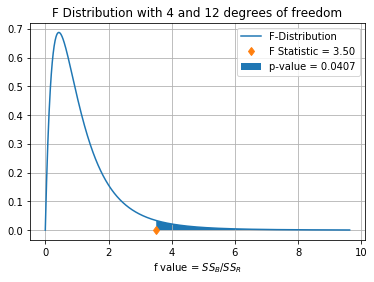

In [38]:
#Compare to the F Distribution for the row for blocks
F_o = F_B
dfn = SS_blocks_dof
dfd = SS_resid_dof
x = np.arange(0.00001,max(f.ppf(0.999,dfn,dfd),F_o),.01)
plt.plot(x,f.pdf(x,dfn,dfd),label="F-Distribution")
plt.plot(F_o,0,'d',label="F Statistic = {:0.2f}".format(F_o))
p_value = f.sf(F_o,dfn,dfd)
plt.fill_between(x, 0, f.pdf(x,dfn,dfd),where = x > F_o, label="p-value = {:0.4f}".format(p_value))
plt.xlabel('f value = $SS_B/SS_R$')
plt.title("F Distribution with {} and {} degrees of freedom".format(dfn,dfd))
plt.legend()
plt.grid();

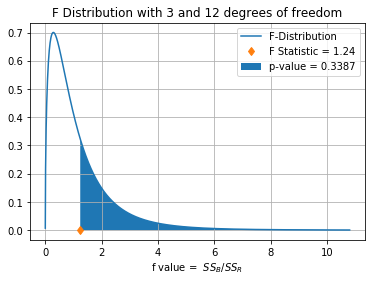

In [39]:
#Compare to the F Distribution
F_o = F_T
dfn = SS_treatments_dof
dfd = SS_resid_dof
x = np.arange(0.00001,max(f.ppf(0.999,dfn,dfd),F_o),.01)
plt.plot(x,f.pdf(x,dfn,dfd),label="F-Distribution")
plt.plot(F_o,0,'d',label="F Statistic = {:0.2f}".format(F_o))
p_value = f.sf(F_o,dfn,dfd)
plt.fill_between(x, 0, f.pdf(x,dfn,dfd),where = x > F_o, label="p-value = {:0.4f}".format(p_value))
plt.xlabel('f value =  $SS_B/SS_R$')
plt.title("F Distribution with {} and {} degrees of freedom".format(dfn,dfd))
plt.legend()
plt.grid();

There is no evidence for differences between treatments. However, there are likely differences due to blends (blocks) at a about a 4% significance. 

## Summary
In this notebook we developed an analysis of variance table from an experiment that employed a blocking strategy to reduce the noise in the data. We calculated each element in the table using the different pandas groupby commands. This showed how each element in an ANOVA table is calculated.

In the second half of this notebook, we use the statsmodel package to create an ANOVA as well. This technique leveraged the pandas data frame. Finally, we showed the graphics of the F statistic and compared it to the F distribution to obtain a p-value and draw conclusions.